In [113]:

%pylab inline
#import mpld3
#mpld3.enable_notebook()

def hash_mavlink_files(filename):
    from sbp.msg import crc16
    fd = open(filename)
    buffer = fd.read(2048)
    return crc16(buffer)

class signal():
    def __init__(self, store, frame, field, maskkey=None, maskvalue=None):
        self.store = store
        self.frame = frame
        self.field = field
        self.mask = None
        if maskkey and maskvalue:
            self.mask = lambda x: x[maskkey] == maskvalue
    
    def _get_df(self):
        return self.store[self.frame].transpose()
    
    def _masked_indexes(self):
        return self.mask(self._get_df())
    
    def _return_series(self):
        return self._get_df()[self.field]
    
    def time_series(self):
        if self.mask:
            mask = self._masked_indexes()
            return self._return_series().loc[mask]
        else:
            return self._return_series()
    

class time_history_plot_desc():
    def __init__(self, signal, title):
        self.title = title
        self.signal = signal
        
    

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [114]:
# Create and cache HDF5 Files which are intermediate consumable files for plotting

import subprocess
import os.path
mavlink_files = ['/Users/dzollo/Documents/ardupilot_logs/2.BIN']
tempfile_basedir = '/tmp/'
for eachfile in mavlink_files:
    print "Processing " + eachfile
    jsonfilename = os.path.join(tempfile_basedir,
                                os.path.split(eachfile)[-1] + str(hash_mavlink_files(eachfile)) + ".json"
                                )
    sbphdf5filename = os.path.join(tempfile_basedir,
                                   os.path.split(eachfile)[-1] + str(hash_mavlink_files(eachfile)) + ".hdf5"
                                   )
    mavlinkhdf5filename = os.path.join(tempfile_basedir,
                                        os.path.split(eachfile )[-1] + str(hash_mavlink_files(eachfile)) + ".m.hdf5"
                                       )
    try:
        if not os.path.isfile(jsonfilename):
            print "Creating sbp json file from mavlink dataflash log."
            print subprocess.check_output(['python','-m', 
                                           'piksi_tools.ardupilot.mavlink_decode' , eachfile, 
                                           '-o', jsonfilename], stderr=subprocess.STDOUT)
        else:
            print "Using cached sbp json file : {0}".format(jsonfilename)
        if not os.path.isfile(sbphdf5filename):
            print "Creating pandas hdf5 store from sbp json file."
            print subprocess.check_output(['python','-m', 
                                           'gnss_analysis.tools.records2table', jsonfilename, 
                                           '-o', sbphdf5filename], stderr=subprocess.STDOUT)
        else:
            print "Using cached sbp hdf5 store : {0}".format(sbphdf5filename)
        if not os.path.isfile(mavlinkhdf5filename):
            print "Creating pandas hdf5 store from mavlink dataflash log."
            print subprocess.check_output(['python','-m', 'piksi_tools.ardupilot.mavlink2pandas', eachfile, 
                                           '-o', mavlinkhdf5filename], stderr=subprocess.STDOUT)
        else:
            print "Using cached mavlink hdf5 store : {0}".format(mavlinkhdf5filename)
    except subprocess.CalledProcessError as e:
        import traceback
        print traceback.format_exc()
        print e.output



Processing /Users/dzollo/Documents/ardupilot_logs/2.BIN
Using cached sbp json file : /tmp/2.BIN11792.json
Using cached sbp hdf5 store : /tmp/2.BIN11792.hdf5
Using cached mavlink hdf5 store : /tmp/2.BIN11792.m.hdf5


In [143]:
# Load existing HDF5 Files and display summary information
import pandas as pd
from gnss_analysis.hitl_table_utils import *
piksi = pd.HDFStore(sbphdf5filename) #sbphdf5filename)
mavlink = pd.HDFStore(mavlinkhdf5filename)
#mavlink ,
piksi.rover_spp

,2015-08-06 02:02:35,2015-08-06 02:02:35.200000,2015-08-06 02:02:35.400000,2015-08-06 02:02:36.400000,2015-08-06 02:02:36.600000,2015-08-06 02:02:36.800000,2015-08-06 02:02:37,2015-08-06 02:02:37.200000,2015-08-06 02:02:37.400000,2015-08-06 02:02:37.600000,...,2015-08-06 02:40:09.200000,2015-08-06 02:40:09.400000,2015-08-06 02:40:09.600000,2015-08-06 02:40:09.800000,2015-08-06 02:40:10,2015-08-06 02:40:10.200000,2015-08-06 02:40:19.801000,2015-08-06 02:40:20,2015-08-06 02:40:20.200000,2015-08-06 02:40:20.400000
accuracy,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flags,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
host_offset,2.006698e+01,2.067804e+01,2.080894e+01,1.594710e+02,3.596790e+02,5.595520e+02,7.597730e+02,9.600270e+02,1.159993e+03,1.360455e+03,...,2.253046e+06,2.253248e+06,2.253430e+06,2.253632e+06,2.253834e+06,2.254016e+06,2.263631e+06,2.263831e+06,2.264031e+06,2.264231e+06
host_time,1.438827e+09,1.438827e+09,1.438827e+09,1.438827e+09,1.438827e+09,1.438827e+09,1.438827e+09,1.438827e+09,1.438827e+09,1.438827e+09,...,1.438829e+09,1.438829e+09,1.438829e+09,1.438829e+09,1.438829e+09,1.438829e+09,1.438829e+09,1.438829e+09,1.438829e+09,1.438829e+09
n_sats,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,4.000000e+00,6.000000e+00,5.000000e+00,6.000000e+00
tow,3.529550e+05,3.529552e+05,3.529554e+05,3.529564e+05,3.529566e+05,3.529568e+05,3.529570e+05,3.529572e+05,3.529574e+05,3.529576e+05,...,3.552092e+05,3.552094e+05,3.552096e+05,3.552098e+05,3.552100e+05,3.552102e+05,3.552198e+05,3.552200e+05,3.552202e+05,3.552204e+05
x,-2.704332e+06,-2.704332e+06,-2.704318e+06,-2.704332e+06,-2.704332e+06,-2.704332e+06,-2.704332e+06,-2.704332e+06,-2.704332e+06,-2.704332e+06,...,-2.704339e+06,-2.704339e+06,-2.704339e+06,-2.704339e+06,-2.704339e+06,-2.704325e+06,-2.704326e+06,-2.704327e+06,-2.704327e+06,-2.704332e+06
y,-4.263458e+06,-4.263458e+06,-4.263450e+06,-4.263458e+06,-4.263458e+06,-4.263458e+06,-4.263458e+06,-4.263458e+06,-4.263458e+06,-4.263458e+06,...,-4.263430e+06,-4.263432e+06,-4.263430e+06,-4.263433e+06,-4.263433e+06,-4.263455e+06,-4.263454e+06,-4.263449e+06,-4.263452e+06,-4.263464e+06
z,3.884381e+06,3.884381e+06,3.884376e+06,3.884381e+06,3.884381e+06,3.884381e+06,3.884381e+06,3.884381e+06,3.884381e+06,3.884381e+06,...,3.884368e+06,3.884368e+06,3.884369e+06,3.884370e+06,3.884370e+06,3.884368e+06,3.884391e+06,3.884389e+06,3.884390e+06,3.884393e+06


In [116]:
# show different flight segments with corresponding indices in table.  
# A flight segment is defined as a gap of more than 10 seconds in pixhawk logged timestamps

# For pixhawk, use ublox timestamps, for piksi, use piksi GPSTime message timestamps

piksi_index_series = piksi

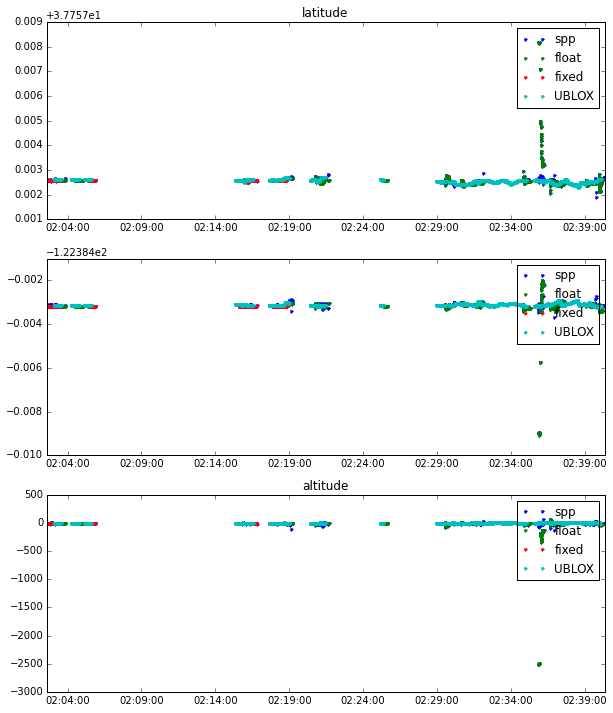

In [117]:
# add in some columns that will be needed for plotting
# Plot an arbitrary number of time histories with the same time vector on the x-axis
# lists of lists get zipped up to coplot
import numpy as np
import matplotlib.pylab as plt

#prepare piksi signals
spp_llh_lat = signal(piksi,'rover_llh', 'lat', 'flags', 0).time_series()
fixed_llh_lat = signal(piksi,'rover_llh', 'lat', 'flags', 1).time_series()
float_llh_lat = signal(piksi,'rover_llh', 'lat', 'flags', 2).time_series()
spp_llh_lon = signal(piksi,'rover_llh', 'lon', 'flags', 0).time_series()
fixed_llh_lon = signal(piksi,'rover_llh', 'lon', 'flags', 1).time_series()
float_llh_lon = signal(piksi,'rover_llh', 'lon', 'flags', 2).time_series()
spp_llh_alt = signal(piksi,'rover_llh', 'height', 'flags', 0).time_series()
fixed_llh_alt = signal(piksi,'rover_llh', 'height', 'flags', 1).time_series()
float_llh_alt = signal(piksi,'rover_llh', 'height', 'flags', 2).time_series()

#prepare GPS1 signals
GPS1_llh_lat = signal(mavlink,'GPS', 'Lat', None, None).time_series()
GPS1_llh_lon = signal(mavlink,'GPS', 'Lng', None, None).time_series()
GPS1_llh_alt = signal(mavlink,'GPS', 'Alt', None, None).time_series()
#prepare GPS2 signals
GPS2_llh_lat = signal(mavlink,'GPS2', 'Lat', None, None).time_series()
GPS2_llh_lon = signal(mavlink,'GPS2', 'Lng', None, None).time_series()
GPS2_llh_alt = signal(mavlink,'GPS2', 'Alt', None, None).time_series()



fig = plt.figure(figsize=[10,12])
ax1 = plt.subplot(3,1,1)
plt.plot(spp_llh_lat.index, spp_llh_lat, '.')
plt.plot(float_llh_lat.index, float_llh_lat, '.')
plt.plot(fixed_llh_lat.index, fixed_llh_lat, '.')
plt.plot(GPS1_llh_lat.index, GPS1_llh_lat, '.')
plt.legend(['spp','float','fixed', 'UBLOX'])
plt.title('latitude')


ax2 = plt.subplot(3,1,2)
plt.plot(spp_llh_lon.index, spp_llh_lon, '.')
plt.plot(float_llh_lon.index, float_llh_lon, '.')
plt.plot(fixed_llh_lon.index, fixed_llh_lon, '.')
plt.plot(GPS1_llh_lon.index, GPS1_llh_lon, '.')
plt.legend(['spp','float','fixed', 'UBLOX'])



ax3 = plt.subplot(3,1,3)
plt.title('longitude')
plt.plot(spp_llh_alt.index, spp_llh_alt, '.')
plt.plot(float_llh_alt.index, float_llh_alt, '.')
plt.plot(fixed_llh_alt.index, fixed_llh_alt, '.')
plt.plot(GPS1_llh_alt.index, GPS1_llh_alt, '.')
plt.legend(['spp','float','fixed', 'UBLOX'])
plt.title('altitude')


-122.3871175


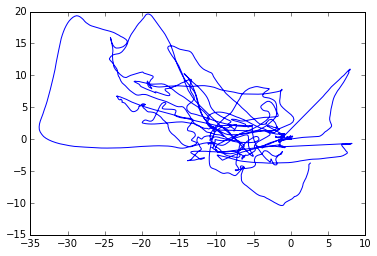

In [174]:
#plot ground tracks

from swiftnav.coord_system import wgsecef2ned, wgsllh2ecef
import math
DEG2R = math.pi/180.0
print GPS1_llh_lon.iloc[0]

ref_posn =  wgsllh2ecef( GPS1_llh_lat.iloc[0] * DEG2R, 
                        GPS1_llh_lon.iloc[0] * DEG2R,  
                        GPS1_llh_alt.iloc[0])
GPS1NED = np.zeros([len(GPS1_llh_lat),3])
i =0 
for eachlat, eachlon, eachalt in zip(GPS1_llh_lat, GPS1_llh_lon, GPS1_llh_alt):
    ecef = wgsllh2ecef(eachlat * DEG2R, eachlon * DEG2R, eachalt)
    GPS1NED[i,:] = wgsecef2ned(ecef, ref_posn)
    i += 1

plot(GPS1NED[:,0],GPS1NED[:,1])